<a href="https://colab.research.google.com/github/Harshal1618/MLBasics/blob/master/KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create 3 clustres of randomized data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

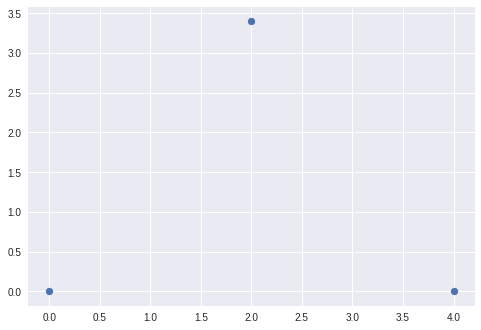

In [0]:
p1 = (0,0)
p2 = (4,0)
p3 = (2,3.4)

l = [p1,p2,p3] 
l_x = [e[0] for e in l]
l_y = [e[1] for e in l]

plt.scatter(l_x, l_y)

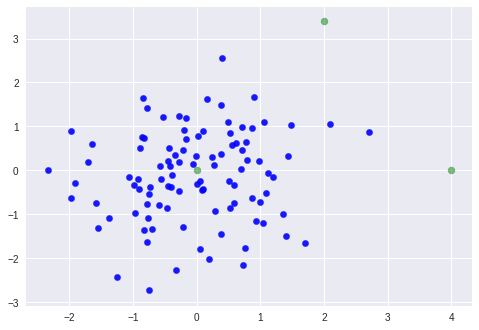

In [0]:

l_dist1_x = np.random.normal(loc = l_x[0], scale = 1.0, size = 100)
l_dist1_y = np.random.normal(loc = l_y[0], scale = 1.0, size = 100)

plt.scatter(l_x, l_y, 50, 'g', alpha = 0.5)
plt.scatter(l_dist1_x, l_dist1_y, 40, 'b', alpha = 0.9)

In [0]:
l_pt_x = []
l_pt_y = []


for i in range(len(l)):
  x_dist = list(np.random.normal(loc = l[i][0], scale = 1.0, size = 50))
  y_dist = list(np.random.normal(loc = l[i][1], scale = 1.0, size = 50))
  
  l_pt_x = l_pt_x + x_dist
  l_pt_y = l_pt_y + y_dist

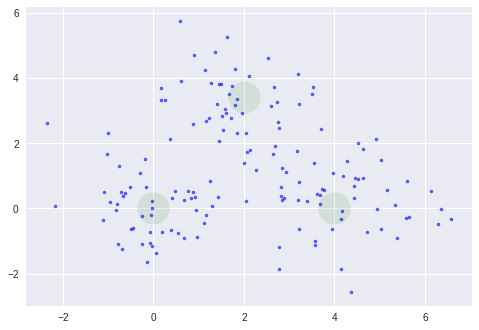

In [0]:
plt.scatter(l_x, l_y, 1000, 'g', alpha = 0.1)
plt.scatter(l_pt_x, l_pt_y,10, 'b', alpha = 0.6)

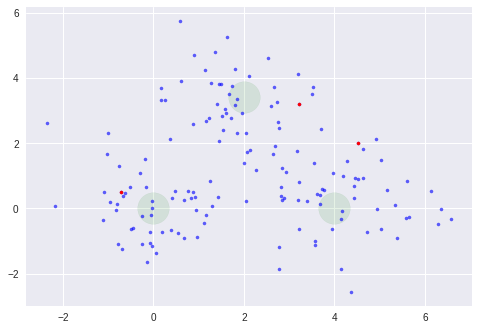

In [0]:
# Define number of means
k = 3

# select random elements
l_random_mean = np.random.randint(0,len(l_pt_x),k)

# Current means
l_curr_mean = []

# plot random means
plt.scatter(l_x, l_y, 1000, 'g', alpha = 0.1)
plt.scatter(l_pt_x, l_pt_y,10, 'b', alpha = 0.6)
for i in range(k):
  plt.scatter(l_pt_x[l_random_mean[i]], l_pt_y[l_random_mean[i]], 10, 'r')
  l_curr_mean.append([l_pt_x[l_random_mean[i]], l_pt_y[l_random_mean[i]]])

In [0]:
import pandas as pd

In [0]:
# Find distance of each point from current mean
df = pd.DataFrame({'pt_x': l_pt_x , 'pt_y': l_pt_y})

In [0]:
def distance(p,x,y):
  d = np.sqrt((p[0]-x)**2 + (p[1]- y)**2)
  return d

In [0]:
df['dist0'] = df.apply(lambda row : distance(l_curr_mean[0], row['pt_x'], row['pt_y']), axis = 1)
df['dist1'] = df.apply(lambda row : distance(l_curr_mean[1], row['pt_x'], row['pt_y']), axis = 1)
df['dist2'] = df.apply(lambda row : distance(l_curr_mean[2], row['pt_x'], row['pt_y']), axis = 1)

In [0]:
df.head()

,pt_x,pt_y,dist0,dist1,dist2
0,-0.677960,0.378003,5.447223,4.823929,0.141361
1,-0.071807,-1.043983,5.516326,5.381874,1.684302
2,1.244560,0.842424,3.476756,3.086852,1.976641
3,-0.075662,-0.720497,5.346830,5.132748,1.388130
4,-0.031521,0.011969,4.970848,4.565057,0.841699


In [0]:
df['closest'] = df.apply(lambda row : np.argmin(list(row[['dist0','dist1','dist2']])), axis = 1)

In [0]:
df.head()

,pt_x,pt_y,dist0,dist1,dist2,closest
0,-0.677960,0.378003,5.447223,4.823929,0.141361,2
1,-0.071807,-1.043983,5.516326,5.381874,1.684302,2
2,1.244560,0.842424,3.476756,3.086852,1.976641,2
3,-0.075662,-0.720497,5.346830,5.132748,1.388130,2
4,-0.031521,0.011969,4.970848,4.565057,0.841699,2


In [0]:
for i in range(k):
  l_curr_mean[i][0] = df['pt_x'][df['closest'] == i].mean()
  l_curr_mean[i][1] = df['pt_x'][df['closest'] == i].mean()

In [0]:
df.head()

,pt_x,pt_y,dist0,dist1,dist2,closest
0,-0.677960,0.378003,5.447223,4.823929,0.141361,2
1,-0.071807,-1.043983,5.516326,5.381874,1.684302,2
2,1.244560,0.842424,3.476756,3.086852,1.976641,2
3,-0.075662,-0.720497,5.346830,5.132748,1.388130,2
4,-0.031521,0.011969,4.970848,4.565057,0.841699,2


In [0]:
l_curr_mean

[[4.258753628283811, 4.258753628283811],
 [1.8916720444932928, 1.8916720444932928],
 [0.03429835852931632, 0.03429835852931632]]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

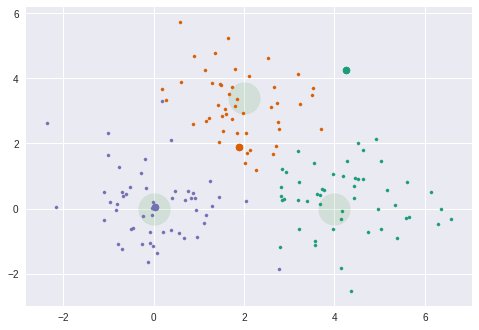

In [0]:
colormap = cm.Dark2.colors
# plot random means
plt.scatter(l_x, l_y, 1000, 'g', alpha = 0.1)
#plt.scatter(l_pt_x, l_pt_y,10, 'b', alpha = 0.6)
for i in range(k):
  plt.scatter(l_curr_mean[i], l_curr_mean[i], 50, colormap[i])
  plt.scatter(df['pt_x'][df['closest'] == i],
              df['pt_y'][df['closest'] == i],
             10, colormap[i])

In [0]:
l_curr_mean

[[4.258753628283811, 4.258753628283811],
 [1.8916720444932928, 1.8916720444932928],
 [0.03429835852931632, 0.03429835852931632]]

In [0]:
k

3

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Iter:0 Mean:0 Value X:nan Value Y:nan
Iter:0 Mean:1 Value X:nan Value Y:nan
Iter:0 Mean:2 Value X:nan Value Y:nan
Iter:1 Mean:0 Value X:2.0244272033828605 Value Y:2.0244272033828605
Iter:1 Mean:1 Value X:nan Value Y:nan
Iter:1 Mean:2 Value X:nan Value Y:nan
Iter:2 Mean:0 Value X:nan Value Y:nan
Iter:2 Mean:1 Value X:nan Value Y:nan
Iter:2 Mean:2 Value X:nan Value Y:nan
Iter:3 Mean:0 Value X:2.0244272033828605 Value Y:2.0244272033828605
Iter:3 Mean:1 Value X:nan Value Y:nan
Iter:3 Mean:2 Value X:nan Value Y:nan
Iter:4 Mean:0 Value X:nan Value Y:nan
Iter:4 Mean:1 Value X:nan Value Y:nan
Iter:4 Mean:2 Value X:nan Value Y:nan
Iter:5 Mean:0 Value X:2.0244272033828605 Value Y:2.0244272033828605
Iter:5 Mean:1 Value X:nan Value Y:nan
Iter:5 Mean:2 Value X:nan Value Y:nan
Iter:6 Mean:0 Value X:nan Value Y:nan
Iter:6 Mean:1 Value X:nan Value Y:nan
Iter:6 Mean:2 Value X:nan Value Y:nan
Iter:7 Mean:0 Value X:2.0244272033828605 Value Y:2.0244272033828605
Iter:7 Mean:1 Value X:nan Value Y:nan
Iter:7

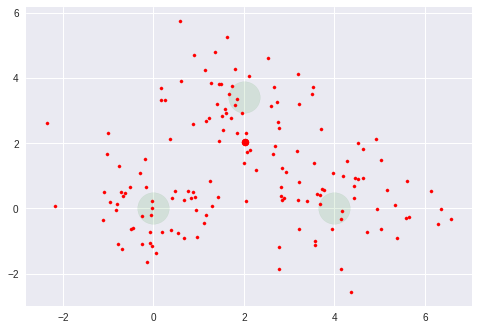

In [0]:
# define iter 
iter = 10
#colormap = cm.Dark2.colors
colormap = ['r','g','b']
for i in range(iter):
  df['dist0'] = df.apply(lambda row : distance(l_curr_mean[0], row['pt_x'], row['pt_y']), axis = 1)
  df['dist1'] = df.apply(lambda row : distance(l_curr_mean[1], row['pt_x'], row['pt_y']), axis = 1)
  df['dist2'] = df.apply(lambda row : distance(l_curr_mean[2], row['pt_x'], row['pt_y']), axis = 1)
  df['closest'] = df.apply(lambda row : np.argmin(row[['dist0','dist1','dist2']]), axis = 1)
  
  for j in range(k):
    l_curr_mean[j][0] = df['pt_x'][df['closest'] == j].mean()
    l_curr_mean[j][1] = df['pt_x'][df['closest'] == j].mean()
    print('Iter:{} Mean:{} Value X:{} Value Y:{}'.format(i,j,l_curr_mean[j][0], l_curr_mean[j][1]))
    
plt.scatter(l_x, l_y, 1000, 'g', alpha = 0.1)
for i in range(k):
  plt.scatter(l_curr_mean[i], l_curr_mean[i], 50, colormap[i])
  plt.scatter(df['pt_x'][df['closest'] == i],
              df['pt_y'][df['closest'] == i],
             10,colormap[i])

In [0]:
k

3

In [0]:
df.head()

,pt_x,pt_y,dist0,dist1,dist2,closest
0,-1.604592,0.404497,NaN,NaN,NaN,0
1,-1.091622,-1.041939,NaN,NaN,NaN,0
2,0.740134,-0.495918,NaN,NaN,NaN,0
3,0.718781,0.654268,NaN,NaN,NaN,0
4,1.314950,-0.217336,NaN,NaN,NaN,0


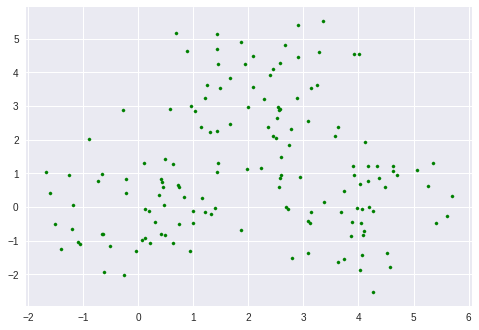

In [0]:
plt.scatter(df['pt_x'][df['closest'] == 0],
             df['pt_y'][df['closest'] == 0],
             10, colormap[1])

In [0]:
for j in range(k):
    l_curr_mean[j][0] = df['pt_x'][df['closest'] == 'dist'+str(j)].mean()
    l_curr_mean[j][1] = df['pt_x'][df['closest'] == 'dist'+str(j)].mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: ignored

In [0]:
df['pt_x'][df['closest'] == 'dist'+str(0)].mean()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: ignored

In [0]:
df[df['closest'] == 'dist0']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: ignored

In [0]:
df.head()

,pt_x,pt_y,dist0,dist1,dist2,closest
0,0.639867,0.411911,2.207222,3.849840,0.163726,2
1,-0.159413,-0.377445,1.088963,4.972190,1.162312,0
2,-0.122368,-1.758639,1.164026,6.032257,2.399832,0
3,-1.931789,1.556947,2.740042,5.446004,2.676192,2
4,0.427339,-0.616870,1.515612,4.781556,1.169114,2
